# Assignment 3

In [13]:
suppressPackageStartupMessages(library(alr4))
suppressMessages(attach(water))

## 3.6
### 3.6.1

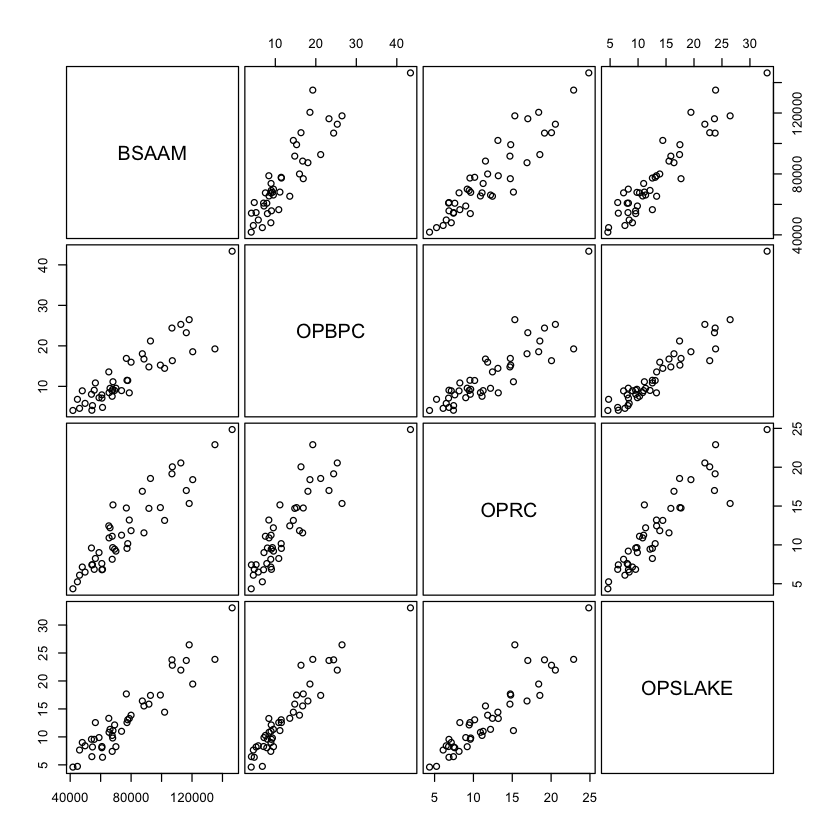

In [14]:
pairs(BSAAM~OPBPC+OPRC+OPSLAKE,data=water,gap=0.4,cex.labels=1.5)

The correlation matrix should have perfect 1.0000 values along the top-left-to-bottom-right diagonal, because these values reflect correlation with itself. The rest should be fairly large and positive, as all of the scatterplots display fairly tight linear trends. However, a few have a noticeable outlier affecting this trend.

In [15]:
waterc<-cbind(BSAAM,OPBPC,OPRC,OPSLAKE)
cor(waterc)

,BSAAM,OPBPC,OPRC,OPSLAKE
BSAAM,1.0000000,0.8857478,0.9196270,0.9384360
OPBPC,0.8857478,1.0000000,0.8647073,0.9433474
OPRC,0.9196270,0.8647073,1.0000000,0.9191447
OPSLAKE,0.9384360,0.9433474,0.9191447,1.0000000


### 3.6.2

In [16]:
summary(lm(BSAAM~OPBPC+OPRC+OPSLAKE))


Call:
lm(formula = BSAAM ~ OPBPC + OPRC + OPSLAKE)

Residuals:
     Min       1Q   Median       3Q      Max 
-15964.1  -6491.8   -404.4   4741.9  19921.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22991.85    3545.32   6.485  1.1e-07 ***
OPBPC          40.61     502.40   0.081  0.93599    
OPRC         1867.46     647.04   2.886  0.00633 ** 
OPSLAKE      2353.96     771.71   3.050  0.00410 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8304 on 39 degrees of freedom
Multiple R-squared:  0.9017,	Adjusted R-squared:  0.8941 
F-statistic: 119.2 on 3 and 39 DF,  p-value: < 2.2e-16


T-values reflect how extreme the result is given the assumption that the parameter is actually equal to 0. For example, if the null hypothesis is that $\beta_{i} = 0$, a larger t -value says the $\beta_{i}$ obtained statistically is more extreme, which is evidence against the null hypothesis of the $\beta_{i}$ being 0. 

Here we have large t-values for `OPRC` and `OPSLAKE` but not for `OPBPC`, so we have evidence that `OPRC` and `OPSLAKE` are not zero, but we do not have evidence that `OPBPC` is not zero, meaning we cannot reject the null hypothesis that `OPBPC` has no effect on `BSAAM`.

### 3.6.3

Testing the hypothesis that `BSAAM` is independent of `OPRC`, `OPSLAKE`, and `OPBC` is testing $H_{0}: \beta_{1} = \beta_{2} = \beta_{3} = 0$ versus the alternative that at least one of the $\beta_{i}$ $\neq$ 0. We are testing that `BSAAM` is independent of all three, so if there is evidence of it depending on one there is evidence against the null.

This is given by the F-statistic in the regression table. The f-statistic is large at 119.2 and the p-value for the test is many magnitudes smaller than 0.001, which provides very strong evidence against the null hypothesis.

### 3.6.4

We are testing

$H_{0}: E($ `BSAAM` $|$ `OPBPC`,`OPRC`,`OPSLAKE`$) = \beta_{0} + \beta_{1}$ `OPSLAKE`

versus 

$H_{a}: E($ `BSAAM` $|$ `OPBPC`,`OPRC`,`OPSLAKE`$) = \beta_{0} + \beta_{1}$ `OPBPC` $ + \beta_{2}$ `OPRC` $ + \beta_{3}$ `OPSLAKE`

In [17]:
h0_lm <- lm(BSAAM~OPSLAKE)
ha_lm <- lm(BSAAM~OPBPC + OPRC + OPSLAKE)
h0_RSS <- sum((BSAAM-fitted(h0_lm))^2)
ha_RSS <- sum((BSAAM-fitted(ha_lm))^2)
h0_df <- length(BSAAM) - 2
ha_df <- length(BSAAM) - 4
h0_RSS
ha_RSS

[1] 3264010454

[1] 2689509185

In [18]:
F <- ((h0_RSS - ha_RSS) / (h0_df - ha_df)) / (ha_RSS/ha_df)
F

[1] 4.16536

In [19]:
p <- 1-pf(F,2,length(BSAAM)-4)
p

[1] 0.02293343

This p-value for the F-test is < 0.05 which means we have evidence against the null hypothesis. Therefore we have evidence that one or more of `OPBPC` or `OPRC` $\neq 0$

### 3.6.5

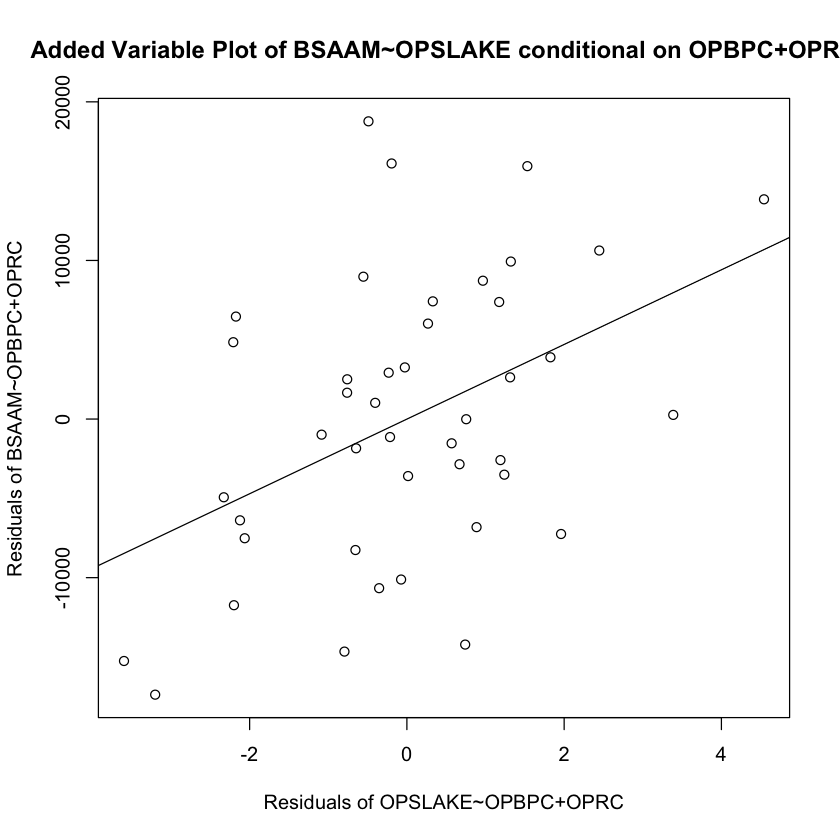

In [20]:
start_lm <- (lm(BSAAM~OPBPC + OPRC))
adding_lm <- (lm(BSAAM~OPBPC+OPRC+OPSLAKE))
plot(resid(lm(OPSLAKE~OPBPC+OPRC)),resid(start_lm),ylab="Residuals of BSAAM~OPBPC+OPRC",xlab="Residuals of OPSLAKE~OPBPC+OPRC",main="Added Variable Plot of BSAAM~OPSLAKE conditional on OPBPC+OPRC")
av_lm <- lm(resid(start_lm)~resid(lm(OPSLAKE~OPBPC+OPRC)))
abline(av_lm)

In [21]:
summary(av_lm)


Call:
lm(formula = resid(start_lm) ~ resid(lm(OPSLAKE ~ OPBPC + OPRC)))

Residuals:
     Min       1Q   Median       3Q      Max 
-15964.1  -6491.8   -404.4   4741.9  19921.2 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)                       1.335e-13  1.235e+03   0.000  1.00000   
resid(lm(OPSLAKE ~ OPBPC + OPRC)) 2.354e+03  7.526e+02   3.128  0.00324 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8099 on 41 degrees of freedom
Multiple R-squared:  0.1926,	Adjusted R-squared:  0.1729 
F-statistic: 9.782 on 1 and 41 DF,  p-value: 0.003238


The ${R}^2$ says that 19.3% of the remaining variability in BSAAM is explained by the addition of OPSLAKE to the regression model. That combined with the high F-statistic and significantly low p-value, OPSLAKE should be added to the model.

## Problem 2

In [23]:
suppressPackageStartupMessages(library(MPV))
suppressMessages(attach(table.b4))

### 2.1

In [24]:
model <- lm(y~x1+x2+x3+x4+x5+x6+x7+x8+x9)

In [25]:
summary(model)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9)

Residuals:
   Min     1Q Median     3Q    Max 
-3.720 -1.956 -0.045  1.627  4.253 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 14.92765    5.91285   2.525   0.0243 *
x1           1.92472    1.02990   1.869   0.0827 .
x2           7.00053    4.30037   1.628   0.1258  
x3           0.14918    0.49039   0.304   0.7654  
x4           2.72281    4.35955   0.625   0.5423  
x5           2.00668    1.37351   1.461   0.1661  
x6          -0.41012    2.37854  -0.172   0.8656  
x7          -1.40324    3.39554  -0.413   0.6857  
x8          -0.03715    0.06672  -0.557   0.5865  
x9           1.55945    1.93750   0.805   0.4343  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.949 on 14 degrees of freedom
Multiple R-squared:  0.8531,	Adjusted R-squared:  0.7587 
F-statistic: 9.037 on 9 and 14 DF,  p-value: 0.000185


a) Only ${x}_1$ has a p-value which is significant, being less than 0.1. Even then it's only in the least significant of conventionally significant thresholds. Therefore, the evidence is against any of the regressors besides ${x}_1$ contributing to the model. We do have to be careful, however, since one would think taxes are determined by the sale price of the house, and therefore its inclusion in the model would be an example of leakage.

b) The F-statistic is evidence that the model is significant, meaning at least one of the variables is different from 0. (One of the $\beta{i} \neq 0$)

### 2.2

Just by intuition I would assume that number of baths, number of bedrooms, lot size and living space would have significant impact on sale price of a house. Let's try this model.

In [26]:
my_lm <- lm(y~x2+x3+x4+x7)
summary(my_lm)


Call:
lm(formula = y ~ x2 + x3 + x4 + x7)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4244 -1.1790 -0.3872  1.1297  8.3516 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  11.5025     5.0053   2.298   0.0331 *
x2           10.4926     4.7146   2.226   0.0383 *
x3            1.0292     0.4998   2.059   0.0535 .
x4            5.8710     5.2207   1.125   0.2748  
x7           -1.0936     1.7434  -0.627   0.5379  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.728 on 19 degrees of freedom
Multiple R-squared:  0.6814,	Adjusted R-squared:  0.6143 
F-statistic: 10.16 on 4 and 19 DF,  p-value: 0.0001426


This model suggests that number of baths and to a lesser extent lot size have a significant contribution to our model of sale price of the house. I'm especially surprised that number of bathrooms is not significant because two of the things you typically see first in a listing are number of bedrooms and number of bathrooms. The F-statistic corroborates this with it's very low p-value, suggesting that at least one of the regressors has a significant contribution to the model. Overall it seems the low sample size is definitely impacting the data set's ability to produce models since standard errors are large and so t-statistics are small.

### 2.3

In [27]:
lm_2 <- lm(y~x2+x3)
summary(lm_2)


Call:
lm(formula = y ~ x2 + x3)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0454 -1.4532 -0.1941  0.7847  9.2041 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.1264     3.8812   2.867 0.009234 ** 
x2           13.3682     3.4834   3.838 0.000957 ***
x3            1.3079     0.4269   3.064 0.005897 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.663 on 21 degrees of freedom
Multiple R-squared:  0.6601,	Adjusted R-squared:  0.6277 
F-statistic: 20.39 on 2 and 21 DF,  p-value: 1.201e-05


### 2.4

In [28]:
lm_5 <- lm(y~x2+x3+x5+x6+x8)
summary(lm_5)


Call:
lm(formula = y ~ x2 + x3 + x5 + x6 + x8)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4219 -1.9726 -0.0681  0.9664  7.5636 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 13.61758    5.44271   2.502  0.02222 * 
x2          12.11380    3.38694   3.577  0.00216 **
x3           0.88424    0.42206   2.095  0.05058 . 
x5           2.55202    1.39400   1.831  0.08375 . 
x6           0.33185    1.15721   0.287  0.77757   
x8          -0.10622    0.05428  -1.957  0.06607 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.204 on 18 degrees of freedom
Multiple R-squared:  0.7771,	Adjusted R-squared:  0.7151 
F-statistic: 12.55 on 5 and 18 DF,  p-value: 2.4e-05


For x3, x5, and x8, we have evidence and for x2 strong evidence that they contribute to the model based on their p-values.

We are testing

$H_{0}: Y = \beta_{0} + \beta_{2}x_{3} + \beta_{3}x_{5} + \beta_{4}x_{6}$

versus 

$H_{a}: Y = \beta_{0} + \beta_{1}x_{2} + \beta_{2}x_{3} + \beta_{3}x_{5} + \beta_{4}x_{6} + \beta_{5}x_{8}$

In [29]:
h0_lm <- lm(y~x3+x5+x6)
ha_lm <- lm(y~x2+x3+x5+x6+x8)
h0_rss <- sum((y-fitted(h0_lm))^2)
ha_rss <- sum((y-fitted(ha_lm))^2)
h0_df <- length(y) - 4
ha_df <- length(y) - 6
F <- ((h0_rss-ha_rss)/(h0_df-ha_df))/(ha_rss/ha_df)
F

[1] 9.125838

In [30]:
p <- 1-pf(F, (h0_df-ha_df), ha_df)
p

[1] 0.001834424

This low p-value gives evidence against leaving $x_{2}$ and $x_{8}$ out of the model. 

### 2.5

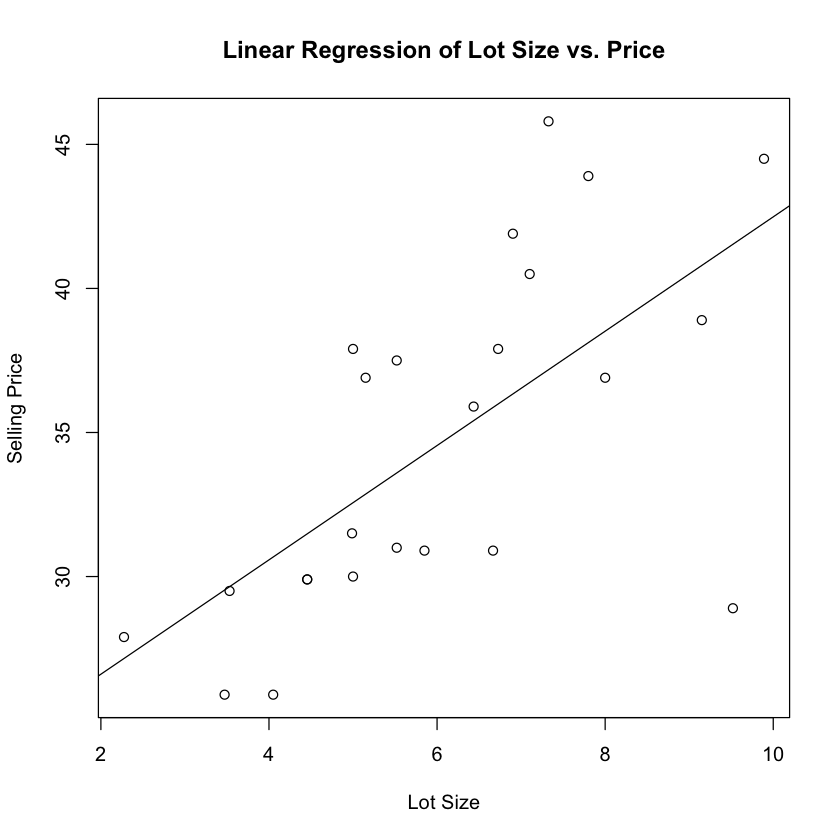

In [31]:
plot (x3, y, ylab="Selling Price", xlab="Lot Size", main = "Linear Regression of Lot Size vs. Price")
abline(lm(y~x3))

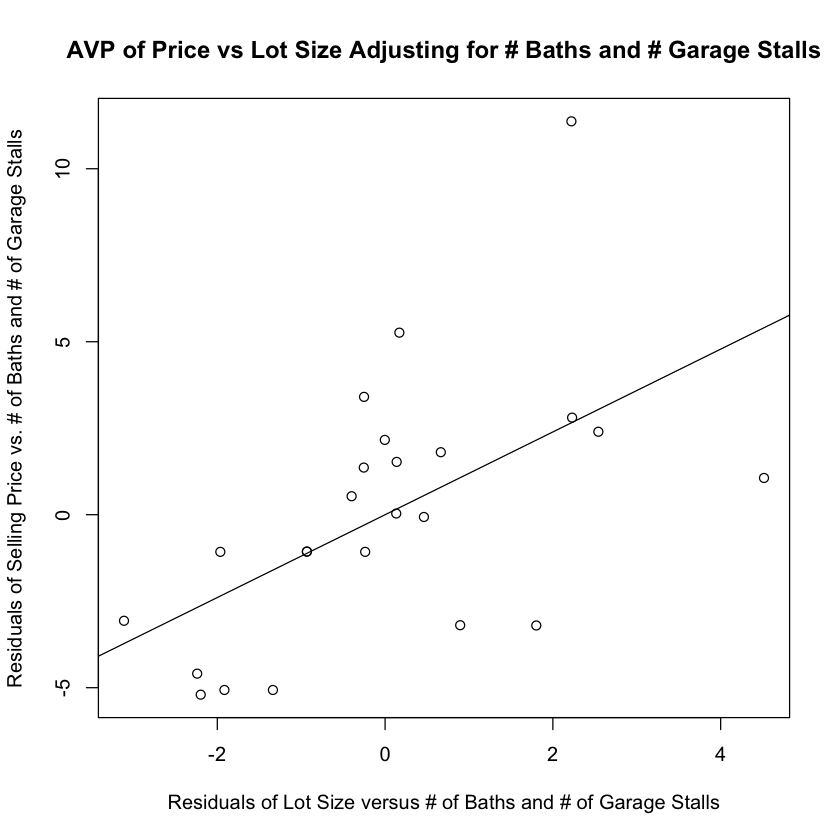

In [32]:
lm_a <- lm(y~x2+x5)
lm_b <- lm(x3~x2+x5)
plot (resid(lm_b),resid(lm_a), ylab = "Residuals of Selling Price vs. # of Baths and # of Garage Stalls", xlab="Residuals of Lot Size versus # of Baths and # of Garage Stalls", main="AVP of Price vs Lot Size Adjusting for # Baths and # Garage Stalls")
abline(lm(resid(lm_a)~resid(lm_b)))

### 2.6

In [33]:
summary(lm(resid(lm_a)~resid(lm_b)))


Call:
lm(formula = resid(lm_a) ~ resid(lm_b))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3585 -2.0776  0.0498  1.2981  8.7121 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -7.281e-17  6.540e-01    0.00  1.00000   
resid(lm_b)  1.197e+00  3.764e-01    3.18  0.00434 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.204 on 22 degrees of freedom
Multiple R-squared:  0.3148,	Adjusted R-squared:  0.2837 
F-statistic: 10.11 on 1 and 22 DF,  p-value: 0.004336


The intercept $\beta_{0}$ is virtually 0, being infinitesimally small.

In [34]:
lm_combined <- lm(y~x2+x3+x5)
summary(lm_combined)


Call:
lm(formula = y ~ x2 + x3 + x5)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3585 -2.0776  0.0498  1.2981  8.7121 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   9.6085     3.6251   2.651  0.01535 * 
x2           12.2412     3.2354   3.784  0.00117 **
x3            1.1968     0.3948   3.032  0.00659 **
x5            2.6687     1.1989   2.226  0.03768 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.361 on 20 degrees of freedom
Multiple R-squared:  0.7276,	Adjusted R-squared:  0.6867 
F-statistic:  17.8 on 3 and 20 DF,  p-value: 7.229e-06


The slope of the Added Variable Plot is the estimated coefficient of $x_{3}$ in the model, which is 1.1968 as given by the summary.

In [36]:
c1 <- resid(lm_combined)
c2 <- resid(lm(resid(lm_a)~resid(lm_b)))
all.equal(c1,c2)

[1] TRUE

The residuals can be checked by asserting that they match between the overall model and the added variable plot.

### 2.6.6

In [37]:
predict(lm_combined,data.frame(x3=8000,x2=2,x5=2),int='c')

,fit,lwr,upr
1,9613.952,3033.278,16194.63


In [38]:
predict(lm_combined,data.frame(x3=8000,x2=2,x5=2),int='p')

,fit,lwr,upr
1,9613.952,3033.274,16194.63


The prediction interval is wider than the confidence interval which is expected.